In [1]:
import mysql.connector as mysql
import pandas as pd
import folium
import requests
import googlemaps
from geopy.distance import geodesic
import numpy as np
from tqdm import tqdm
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from matplotlib import font_manager
from matplotlib import rc

#database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com

In [2]:
remote = mysql.connect (
    host = "database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "roschool",
    password = "1234",
    database = "roschool"
)

In [9]:
cursor = remote.cursor(buffered=True)

cursor.execute("""
            SELECT tech_name , count(tech_name)  as count FROM tech_info te, prefer_tech pr
            WHERE (te.tech_id = pr.tech_id) 
            GROUP BY tech_name
            HAVING count > 6
            ORDER BY count DESC
""")

result = cursor.fetchall()

df = pd.DataFrame(result)

df

,0,1
0,ROS,54
1,Linux,29
2,C++,20
3,Git,16
4,Embedded,15
5,SLAM,15
6,Docker,14
7,Python,13
8,C,7


In [10]:
df.columns = ["기술스택", "수"]
df

,기술스택,수
0,ROS,54
1,Linux,29
2,C++,20
3,Git,16
4,Embedded,15
5,SLAM,15
6,Docker,14
7,Python,13
8,C,7


findfont: Font family 'Malgun Gothic' not found.


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

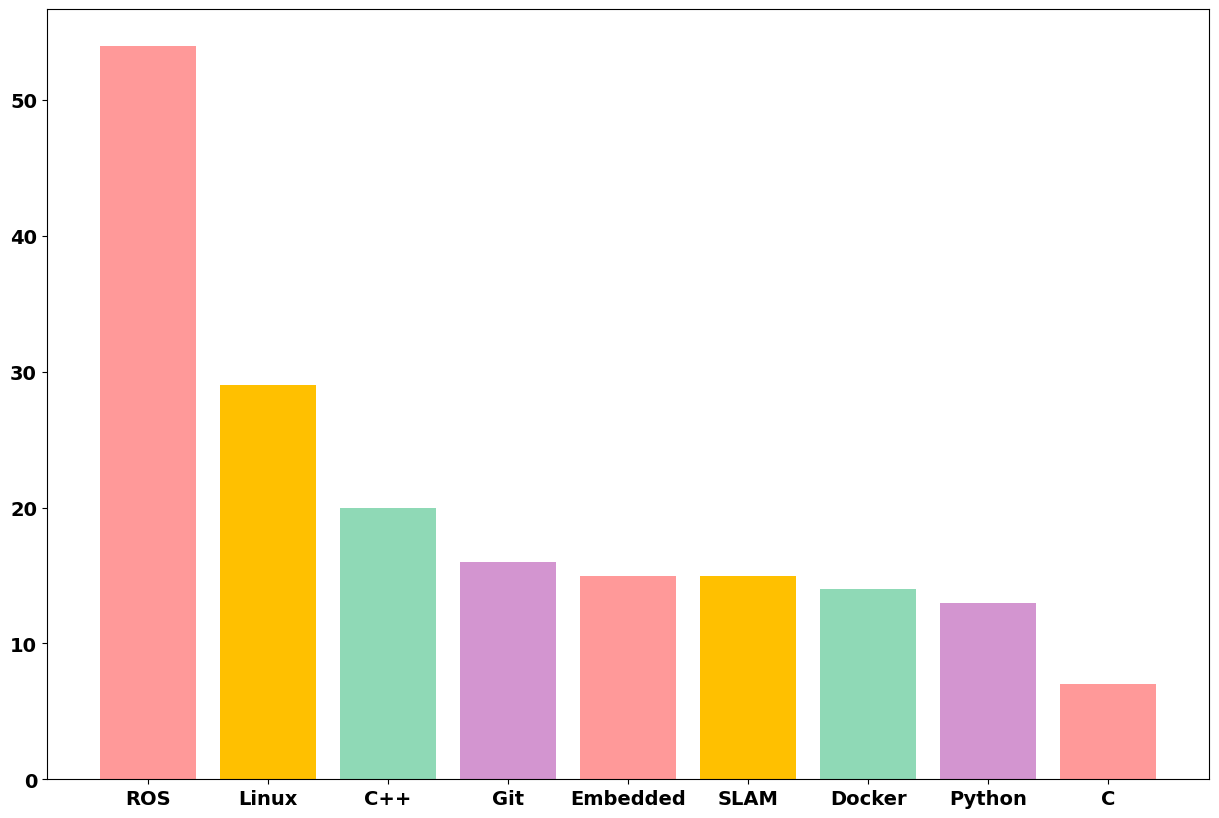

In [14]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (필요시 주석 해제)
# from matplotlib import rc
# rc('font', family='Malgun Gothic')  # 한글 폰트 설정 (Windows: 맑은 고딕)

# 색상 설정
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']

# 막대 그래프 생성
plt.figure(figsize=(15, 10))
plt.bar(df["기술스택"], df["수"], color=colors[:len(df)])

# 폰트 크기와 굵기 설정
plt.xticks(fontsize=14, fontweight='bold')  # x축 눈금
plt.yticks(fontsize=14, fontweight='bold')  # y축 눈금
# plt.xlabel("기술 스택", fontsize=16, fontweight='bold')  # x축 라벨
# plt.ylabel("수", fontsize=16, fontweight='bold')  # y축 라벨
# plt.title("기술 스택 별 수량 분포", fontsize=18, fontweight='bold')  # 제목

# 그래프 표시
plt.show()


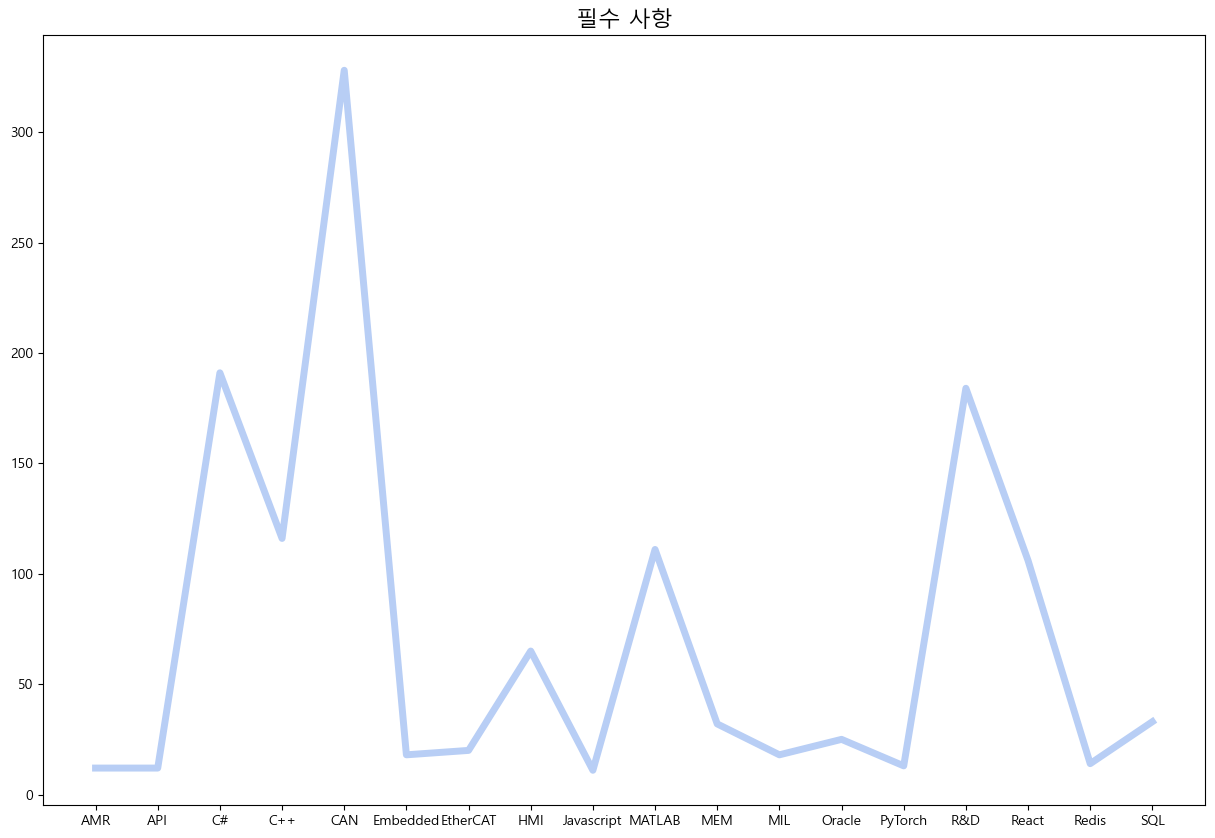

In [16]:
import matplotlib.pyplot as plt
from matplotlib import rc

# 한글 폰트 설정
rc('font', family='Malgun Gothic')

# 색상 리스트
colors = [
    "#163F98", "#B373A0", "#40AF97", "#070B46", "#665A0A", "#3C322A",
    "#B8CEF5", "#BB5006", "#ACBC5F", "#4909AA", "#BFB783", "#9EAB77",
    "#A4FB99", "#C23805", "#F399F4", "#3D3046", "#3C9E8B", "#7F07E3"
]

# 그래프 크기 설정
plt.figure(figsize=(15, 10))

# 막대 그래프
# plt.bar(df["기술스택"], df["수"], color=colors[:len(df)], label="수")

# 꺾은선 그래프 추가
plt.plot(df["기술스택"], df["수"], color="#B8CEF5", linestyle="-", linewidth=5, label="꺾은선 그래프")

# 제목 및 축 레이블
plt.title("필수 사항", fontsize=16)

# 범례 추가
# plt.legend()

# 그래프 표시
plt.show()


In [17]:
remote.close()